# Analisi dei 3 giorni antecedenti all'inizio della variazione dei picchi NFT (sia positivi che negativi) esaminando anche la sentiment analysis dei tweet e il punteggio totale (di ogni singolo tweet) che mi serve a capire quali sono stati i tweet più influenti

### Importazione librerie e datadrames

In [91]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib.dates import DateFormatter, DayLocator
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
import mplcursors
import plotly.express as px
from datetime import datetime
from tabulate import tabulate
import numpy as np
import os


In [92]:
# Caricamento dei dataset
top_nft_positivi = pd.read_csv("../dataframes/top_nft_positivi_df.csv")
top_nft_negativi = pd.read_csv("../dataframes/top_nft_negativi_df.csv")
tweets_sentiment = pd.read_csv("../dataframes/tweets_sentiment_df.csv") 
tweets_collection = pd.read_csv("../datasets/twitter/twitter_tweet_collection.csv")

# Converti le colonne delle date in formato datetime
top_nft_positivi['data_inizio'] = pd.to_datetime(top_nft_positivi['data_inizio'])
top_nft_negativi['data_inizio'] = pd.to_datetime(top_nft_negativi['data_inizio'])
tweets_sentiment['created_at'] = pd.to_datetime(tweets_sentiment['created_at'])

## Analisi top nft POSITIVI

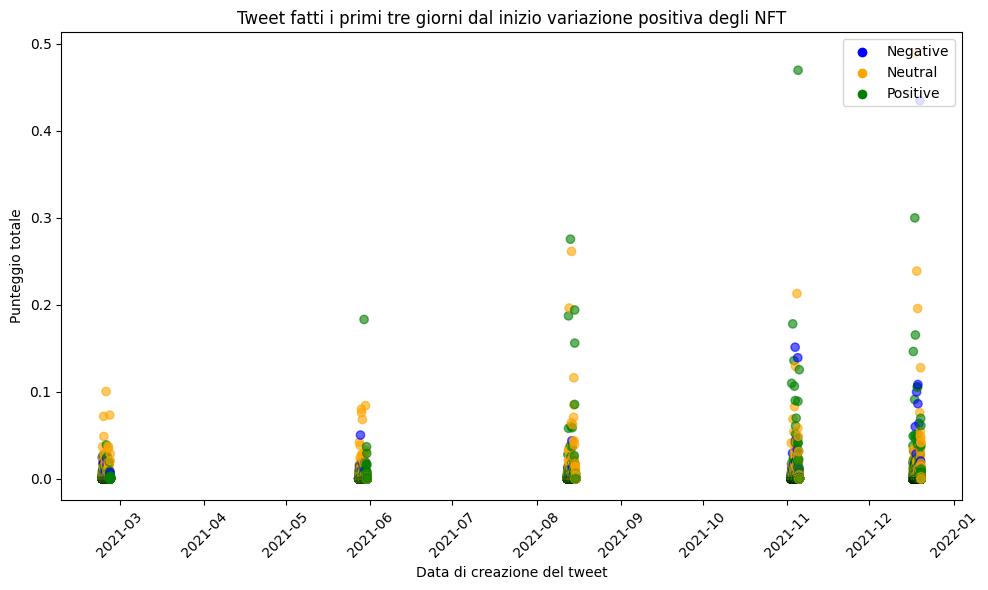

In [93]:
# Preparazione per il filtraggio dei tweet
tweets_nei_primi_tre_giorni = []

# Iterazione su ciascun picco positivo
for index, row in top_nft_positivi.iterrows():
    data_inizio_variazione = row['data_inizio']
    
    # Calcola la data di inizio del periodo di interesse (3 giorni prima della data_inizio_variazione)
    data_inizio_filtro = data_inizio_variazione - pd.DateOffset(days=3)
    
    # Converti la colonna 'created_at' di tweets_sentiment in datetime se non è già in questo formato
    tweets_sentiment['created_at'] = pd.to_datetime(tweets_sentiment['created_at'])

    # Filtra i tweet che sono stati fatti nei tre giorni precedenti alla data di inizio variazione
    tweets_filtrati = tweets_sentiment[
        (tweets_sentiment['created_at'] >= data_inizio_filtro) & 
        (tweets_sentiment['created_at'] < data_inizio_variazione)
    ]

    # Aggiungi i tweet filtrati alla lista
    tweets_nei_primi_tre_giorni.append(tweets_filtrati)

# Concatena tutti i dataframe di tweet filtrati in uno unico
tweets_nei_primi_tre_giorni = pd.concat(tweets_nei_primi_tre_giorni)

# Verifica e gestione dei valori NaN in 'Sentiment'
tweets_nei_primi_tre_giorni['Sentiment'] = tweets_nei_primi_tre_giorni['Sentiment'].fillna('neutrale')

# Mappa dei colori in base al sentiment
colori_sentiment = {
    'Negative': 'blue',
    'Neutral': 'orange',
    'Positive': 'green'
}

# Aggiungi una colonna di colori basata sul sentiment
tweets_nei_primi_tre_giorni['colori_sentiment'] = tweets_nei_primi_tre_giorni['Sentiment'].map(colori_sentiment)

# Grafico dei tweet filtrati in base al punteggio totale con colori basati sul sentiment
plt.figure(figsize=(10, 6))
plt.scatter(tweets_nei_primi_tre_giorni['created_at'], tweets_nei_primi_tre_giorni['punteggio_totale'], 
            color=tweets_nei_primi_tre_giorni['colori_sentiment'], alpha=0.6)
plt.title('Tweet fatti i primi tre giorni dal inizio variazione positiva degli NFT')
plt.xlabel('Data di creazione del tweet')
plt.ylabel('Punteggio totale')
plt.xticks(rotation=45)
# Legenda
handles = []
labels = []
for sentiment, color in colori_sentiment.items():
    handles.append(plt.scatter([], [], color=color, label=sentiment))
    labels.append(sentiment)
plt.legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.show()

### Per ogni picco positivo stampo una tabella che riporta la data di creazione, il punteggio totale (in ordine descrescente) e il valore della sentiment

In [94]:
for index, row in top_nft_positivi.iterrows():
    data_inizio_variazione = row['data_inizio']
    data_fine_variazione = row['data_fine']
    token_id = row['token_id']

    # Calcola la data di inizio del periodo di interesse (3 giorni prima della data_inizio_variazione)
    data_inizio_filtro = data_inizio_variazione - pd.DateOffset(days=3)
    
    # Converti la colonna 'created_at' di tweets_sentiment in datetime se non è già in questo formato
    tweets_sentiment['created_at'] = pd.to_datetime(tweets_sentiment['created_at'])

    # Filtra i tweet che sono stati fatti nei tre giorni precedenti alla data di inizio variazione
    tweets_filtrati = tweets_sentiment[
        (tweets_sentiment['created_at'] >= data_inizio_filtro) & 
        (tweets_sentiment['created_at'] < data_inizio_variazione)
    ]
    
    # Ordina i tweet filtrati per punteggio totale
    tweets_ordinati = tweets_filtrati.sort_values(by='punteggio_totale', ascending=False)
    
    # Seleziona solo le colonne rilevanti per la tabella
    tweets_da_mostrare = tweets_ordinati[['created_at', 'punteggio_totale', 'Sentiment']]
    
    # Converti la colonna 'created_at' in formato stringa per la visualizzazione
    tweets_da_mostrare['created_at'] = tweets_da_mostrare['created_at'].dt.strftime('%Y-%m-%d %H:%M:%S')
    
    # Converti il dataframe in una lista di tuple per l'uso con tabulate
    tabella_tweet = tweets_da_mostrare.values.tolist()

    # Stampare le informazioni sui picchi positivi NFT
    print(f"\nPicco positivo NFT {index} per il token {token_id} ({data_inizio_variazione} - {data_fine_variazione})")
    
    # Stampa la tabella
    print(tabulate(tabella_tweet, headers=['create_at', 'punteggio_totale', 'Sentiment'], tablefmt='pretty'))

    print ('**********************')


/var/folders/ht/ykt5nd_d1w55_nvpcjzwqvmw0000gn/T/ipykernel_840/3899540303.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_da_mostrare['created_at'] = tweets_da_mostrare['created_at'].dt.strftime('%Y-%m-%d %H:%M:%S')



Picco positivo NFT 0 per il token 6563 (2021-08-15 07:05:16 - 2021-08-30 16:33:32)
+---------------------+------------------------+-----------+
|      create_at      |    punteggio_totale    | Sentiment |
+---------------------+------------------------+-----------+
| 2021-08-13 10:19:09 |   0.2753792109458617   | Positive  |
| 2021-08-13 19:30:43 |   0.2613620707253581   |  Neutral  |
| 2021-08-12 23:08:08 |   0.1962364572108515   |  Neutral  |
| 2021-08-14 23:37:14 |   0.1939855497668958   | Positive  |
| 2021-08-12 16:58:26 |   0.1872362296013296   | Positive  |
| 2021-08-14 23:52:15 |   0.155912547995338    | Positive  |
| 2021-08-14 16:05:00 |   0.1160434899991375   |  Neutral  |
| 2021-08-14 22:55:35 |   0.0854264994747343   | Positive  |
| 2021-08-14 16:43:34 |   0.0848355644738111   |  Neutral  |
| 2021-08-14 14:23:24 |   0.0706657804866366   |  Neutral  |
| 2021-08-13 18:15:25 |   0.0644265212862125   |  Neutral  |
| 2021-08-14 06:14:47 |   0.0621984058956918   |  Neutral  |
|

/var/folders/ht/ykt5nd_d1w55_nvpcjzwqvmw0000gn/T/ipykernel_840/3899540303.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_da_mostrare['created_at'] = tweets_da_mostrare['created_at'].dt.strftime('%Y-%m-%d %H:%M:%S')


+---------------------+------------------------+-----------+
|      create_at      |    punteggio_totale    | Sentiment |
+---------------------+------------------------+-----------+
| 2021-11-04 22:41:57 |   0.4695891010625175   | Positive  |
| 2021-11-04 13:06:30 |   0.2127948371345316   |  Neutral  |
| 2021-11-03 00:00:42 |   0.1780246249806165   | Positive  |
| 2021-11-03 20:55:50 |   0.1512128054337212   | Negative  |
| 2021-11-04 20:13:56 |   0.1390945843494118   | Negative  |
| 2021-11-03 10:40:09 |   0.135753820401923    | Positive  |
| 2021-11-03 23:12:07 |   0.1292904899313642   |  Neutral  |
| 2021-11-05 09:08:39 |   0.1253241305678006   | Positive  |
| 2021-11-02 14:36:55 |   0.1097143025279571   | Positive  |
| 2021-11-03 14:41:22 |   0.106467778804534    | Positive  |
| 2021-11-03 22:01:52 |   0.0899200398539905   | Positive  |
| 2021-11-04 21:31:48 |   0.0890027714647925   | Positive  |
| 2021-11-03 15:54:32 |   0.0829090919490825   |  Neutral  |
| 2021-11-04 05:59:54 | 

/var/folders/ht/ykt5nd_d1w55_nvpcjzwqvmw0000gn/T/ipykernel_840/3899540303.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_da_mostrare['created_at'] = tweets_da_mostrare['created_at'].dt.strftime('%Y-%m-%d %H:%M:%S')


+---------------------+------------------------+-----------+
|      create_at      |    punteggio_totale    | Sentiment |
+---------------------+------------------------+-----------+
| 2021-02-24 00:14:30 |   0.1002877208153558   |  Neutral  |
| 2021-02-25 08:18:22 |   0.0731497297070668   |  Neutral  |
| 2021-02-23 02:37:21 |   0.0716953498881509   |  Neutral  |
| 2021-02-23 04:46:24 |   0.0485398898414283   |  Neutral  |
| 2021-02-24 02:48:20 |   0.0388511801268922   | Positive  |
| 2021-02-24 18:45:43 |   0.037348306828766    |  Neutral  |
| 2021-02-22 17:28:22 |   0.0366424823068672   |  Neutral  |
| 2021-02-24 22:48:07 |    0.03535002120291    |  Neutral  |
| 2021-02-24 06:22:49 |   0.0316103893577455   |  Neutral  |
| 2021-02-25 13:32:26 |   0.0285979595701295   |  Neutral  |
| 2021-02-23 04:56:46 |   0.0284538649816202   |  Neutral  |
| 2021-02-22 22:25:56 |   0.026897895920419    | Positive  |
| 2021-02-24 12:30:31 |   0.0252712317171199   | Positive  |
| 2021-02-24 02:40:27 | 

/var/folders/ht/ykt5nd_d1w55_nvpcjzwqvmw0000gn/T/ipykernel_840/3899540303.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_da_mostrare['created_at'] = tweets_da_mostrare['created_at'].dt.strftime('%Y-%m-%d %H:%M:%S')


+---------------------+------------------------+-----------+
|      create_at      |    punteggio_totale    | Sentiment |
+---------------------+------------------------+-----------+
| 2021-05-29 16:44:15 |   0.1831244855271958   | Positive  |
| 2021-05-30 04:50:17 |   0.0840229061685908   |  Neutral  |
| 2021-05-28 17:31:19 |   0.0798974361660434   |  Neutral  |
| 2021-05-28 18:08:49 |   0.0758756066355273   |  Neutral  |
| 2021-05-29 02:13:49 |   0.0680530879431585   |  Neutral  |
| 2021-05-28 08:52:57 |   0.0501832050709695   | Negative  |
| 2021-05-27 22:43:52 |   0.041752526363668    |  Neutral  |
| 2021-05-28 06:34:18 |   0.0383344455865951   |  Neutral  |
| 2021-05-30 14:19:30 |   0.036822444553557    | Positive  |
| 2021-05-30 09:09:53 |   0.0324787418108463   |  Neutral  |
| 2021-05-30 16:48:47 |   0.0290735801690904   | Positive  |
| 2021-05-28 20:53:35 |   0.0282752049576332   |  Neutral  |
| 2021-05-29 01:30:37 |   0.0281814606948568   |  Neutral  |
| 2021-05-29 21:24:40 | 

/var/folders/ht/ykt5nd_d1w55_nvpcjzwqvmw0000gn/T/ipykernel_840/3899540303.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_da_mostrare['created_at'] = tweets_da_mostrare['created_at'].dt.strftime('%Y-%m-%d %H:%M:%S')


+---------------------+------------------------+-----------+
|      create_at      |    punteggio_totale    | Sentiment |
+---------------------+------------------------+-----------+
| 2021-12-18 01:09:11 |   0.4887218189357467   |  Neutral  |
| 2021-12-19 16:14:12 |   0.4346016792938817   | Negative  |
| 2021-12-17 19:04:51 |   0.2998202252779522   | Positive  |
| 2021-12-18 12:14:38 |   0.2386695428107977   |  Neutral  |
| 2021-12-18 19:55:12 |   0.1956658482116942   |  Neutral  |
| 2021-12-18 00:09:14 |   0.1652145851290714   | Positive  |
| 2021-12-17 06:08:15 |   0.1462746434722147   | Positive  |
| 2021-12-19 22:10:41 |   0.1276281190497679   |  Neutral  |
| 2021-12-18 22:07:16 |   0.108339416882714    | Negative  |
| 2021-12-18 16:44:00 |   0.1057720755904564   | Positive  |
| 2021-12-18 19:46:19 |   0.1052523121488928   | Positive  |
| 2021-12-18 10:44:59 |   0.0997121430812223   | Negative  |
| 2021-12-17 17:23:14 |   0.0910986851913153   | Positive  |
| 2021-12-18 22:25:11 | 

### Per ogni picco mi stampo il numero totale di tweet che possiete i tre giorni precedenti alla data di inizio del picco e il numero di tweet con sentiment positivo, negativo e neutrale

In [95]:
# Iterazione su ciascun picco positivo
for index, row in top_nft_positivi.iterrows():
    data_inizio_variazione = row['data_inizio']
    data_fine_variazione = row['data_fine'] 
    token_id = row['token_id'] 

    
    # Calcola la data di inizio del periodo di interesse (3 giorni prima della data_inizio_variazione)
    data_inizio_filtro = data_inizio_variazione - pd.DateOffset(days=3)
    
    # Converti la colonna 'created_at' di tweets_sentiment in datetime se non è già in questo formato
    tweets_sentiment['created_at'] = pd.to_datetime(tweets_sentiment['created_at'])

    # Filtra i tweet che sono stati fatti nei tre giorni precedenti alla data di inizio variazione
    tweets_filtrati = tweets_sentiment[
        (tweets_sentiment['created_at'] >= data_inizio_filtro) & 
        (tweets_sentiment['created_at'] < data_inizio_variazione)
    ]
    
    # Calcola il numero totale di tweet
    numero_totale_tweet = len(tweets_filtrati)

    # Conta i tweet per ciascun tipo di sentiment
    conteggio_sentiment = tweets_filtrati['Sentiment'].value_counts()
    
    # Stampa il titolo del picco positivo
    print(f"\nPicco positivo NFT {index} per il token {token_id} ({data_inizio_variazione} - {data_fine_variazione})")
    print(f"Numero totale di tweet: {numero_totale_tweet}")
    print(f"Numero di tweet per ogni sentiment:")
    for sentiment, count in conteggio_sentiment.items():
        print("- "f"{sentiment}: {count}")
    
    print ('**********************')


Picco positivo NFT: 0 per il token 6563 (2021-08-15 07:05:16 - 2021-08-30 16:33:32)
Numero totale di tweet: 14026
Numero di tweet per ogni sentiment:
- Positive: 6215
- Neutral: 5880
- Negative: 1931
**********************

Picco positivo NFT: 1 per il token 4037 (2021-11-05 09:46:35 - 2021-11-05 18:42:28)
Numero totale di tweet: 23987
Numero di tweet per ogni sentiment:
- Positive: 11717
- Neutral: 9438
- Negative: 2832
**********************

Picco positivo NFT: 2 per il token 12247 (2021-02-25 14:23:29 - 2021-02-26 02:48:36)
Numero totale di tweet: 7083
Numero di tweet per ogni sentiment:
- Positive: 3139
- Neutral: 2617
- Negative: 1327
**********************

Picco positivo NFT: 3 per il token 8898 (2021-05-30 18:06:57 - 2021-06-01 06:39:14)
Numero totale di tweet: 8338
Numero di tweet per ogni sentiment:
- Positive: 3905
- Neutral: 3299
- Negative: 1134
**********************

Picco positivo NFT: 4 per il token 4704 (2021-12-20 02:29:35 - 2022-01-18 23:35:20)
Numero totale di tw

### Calcolo la media del punteggio totale per ogni picco, scarto i tweet sotto a quella media e mi ricalcolo il numero totale dei tweet del picco e il numero di quelli positivi, neutrali e negativi

In [96]:
# Dizionari per raccogliere i dati per i grafici
data_picchi = []
num_tweet_positivi = []
num_tweet_negativi = []
num_tweet_neutrali = []
punteggio_totale_positivi = []
punteggio_totale_negativi = []
punteggio_totale_neutrali = []

for index, row in top_nft_positivi.iterrows():
    data_inizio_variazione = row['data_inizio']
    data_fine_variazione = row['data_fine'] 
    token_id = row['token_id'] 
    
    # Calcola la data di inizio del periodo di interesse (3 giorni prima della data_inizio_variazione)
    data_inizio_filtro = data_inizio_variazione - pd.DateOffset(days=3)
    
    # Converti la colonna 'created_at' di tweets_sentiment in datetime se non è già in questo formato
    tweets_sentiment['created_at'] = pd.to_datetime(tweets_sentiment['created_at'])

    # Filtra i tweet che sono stati fatti nei tre giorni precedenti alla data di inizio variazione
    tweets_filtrati = tweets_sentiment[
        (tweets_sentiment['created_at'] >= data_inizio_filtro) & 
        (tweets_sentiment['created_at'] < data_inizio_variazione)
    ]
    
    # Calcola il numero totale di tweet
    numero_totale_tweet = len(tweets_filtrati)

    # Conta i tweet per ciascun tipo di sentiment
    conteggio_sentiment = tweets_filtrati['Sentiment'].value_counts()
    
    print(f"\nPicco positivo NFT {index} per il token {token_id} ({data_inizio_variazione} - {data_fine_variazione})")

    # Calcola la media del punteggio totale
    media_punteggio_totale = tweets_filtrati['punteggio_totale'].mean()
    print(f"Media del punteggio totale: {media_punteggio_totale:.4f}")
    
    # Filtra i tweet con punteggio totale superiore alla media
    tweets_filtrati_superiori_media_positivi = tweets_filtrati[tweets_filtrati['punteggio_totale'] > media_punteggio_totale]
    
    print(f"Numero di tweet con punteggio totale sopra la media: {len(tweets_filtrati_superiori_media_positivi)}")

    # Conta i tweet per ciascun tipo di sentiment dopo il secondo filtraggio
    conteggio_sentiment_dopo_filtraggio = tweets_filtrati_superiori_media_positivi['Sentiment'].value_counts()

    print(f"Numero di tweet per ogni sentiment (dopo il filtraggio sulla media):")
    for sentiment, count in conteggio_sentiment_dopo_filtraggio.items():
        print(f"- {sentiment}: {count}")

    print ('**********************')

    # VARIABILI CHE SERVONO PER I DUE GRAFICI DOPO
    # Conta i tweet per ciascun tipo di sentiment
    conteggio_sentiment = tweets_filtrati_superiori_media_positivi['Sentiment'].value_counts()

    # Aggiungi i dati raccolti ai dizionari
    data_picchi.append(f"{data_inizio_variazione} - {data_fine_variazione}")
    num_tweet_positivi.append(conteggio_sentiment.get('Positive', 0))
    num_tweet_negativi.append(conteggio_sentiment.get('Negative', 0))
    num_tweet_neutrali.append(conteggio_sentiment.get('Neutral', 0))

    # Calcola il punteggio totale per ciascun tipo di sentimento
    punteggio_totale_positivi.append(tweets_filtrati_superiori_media_positivi[tweets_filtrati_superiori_media_positivi['Sentiment'] == 'Positive']['punteggio_totale'].sum())
    punteggio_totale_negativi.append(tweets_filtrati_superiori_media_positivi[tweets_filtrati_superiori_media_positivi['Sentiment'] == 'Negative']['punteggio_totale'].sum())
    punteggio_totale_neutrali.append(tweets_filtrati_superiori_media_positivi[tweets_filtrati_superiori_media_positivi['Sentiment'] == 'Neutral']['punteggio_totale'].sum())

    


Picco positivo NFT 0 per il token 6563 (2021-08-15 07:05:16 - 2021-08-30 16:33:32)
Media del punteggio totale: 0.0004
Numero di tweet con punteggio totale sopra la media: 1430
Numero di tweet per ogni sentiment (dopo il filtraggio sulla media):
- Positive: 697
- Neutral: 529
- Negative: 204
**********************

Picco positivo NFT 1 per il token 4037 (2021-11-05 09:46:35 - 2021-11-05 18:42:28)
Media del punteggio totale: 0.0003
Numero di tweet con punteggio totale sopra la media: 2451
Numero di tweet per ogni sentiment (dopo il filtraggio sulla media):
- Positive: 1106
- Neutral: 987
- Negative: 358
**********************

Picco positivo NFT 2 per il token 12247 (2021-02-25 14:23:29 - 2021-02-26 02:48:36)
Media del punteggio totale: 0.0004
Numero di tweet con punteggio totale sopra la media: 967
Numero di tweet per ogni sentiment (dopo il filtraggio sulla media):
- Positive: 421
- Neutral: 382
- Negative: 164
**********************

Picco positivo NFT 3 per il token 8898 (2021-05-30

### Visione grafica

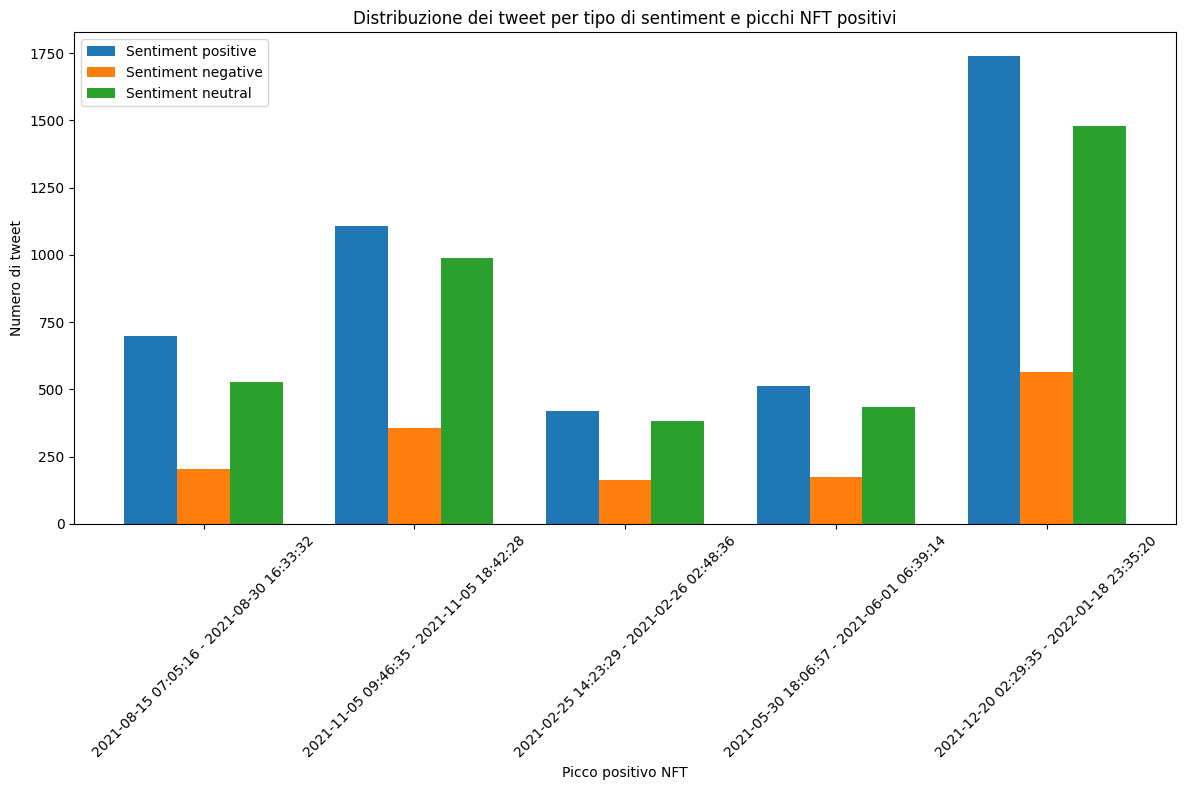

In [97]:
# Creazione dei grafici a barre
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.25
index = range(len(data_picchi))

# Plotting per i tweet positivi, negativi e neutrali
plt.bar(index, num_tweet_positivi, width=bar_width, label='Sentiment positive')
plt.bar([i + bar_width for i in index], num_tweet_negativi, width=bar_width, label='Sentiment negative')
plt.bar([i + 2 * bar_width for i in index], num_tweet_neutrali, width=bar_width, label='Sentiment neutral')

# Impostazioni grafiche
plt.xlabel('Picco positivo NFT')
plt.ylabel('Numero di tweet')
plt.title('Distribuzione dei tweet per tipo di sentiment e picchi NFT positivi')
plt.xticks([i + bar_width for i in index], data_picchi, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


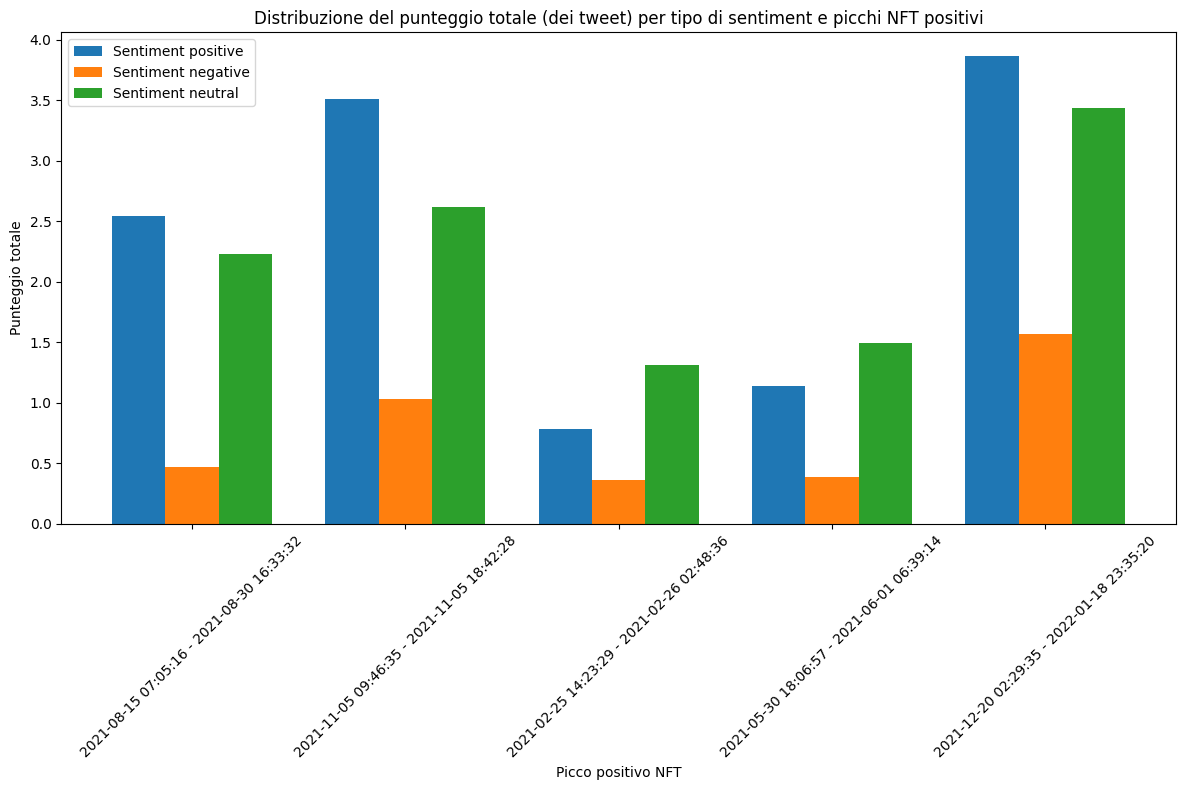

In [98]:
# Creazione dei grafici a barre
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.25
index = range(len(data_picchi))

# Plotting per i tweet positivi, negativi e neutrali
plt.bar(index, punteggio_totale_positivi, width=bar_width, label='Sentiment positive')
plt.bar([i + bar_width for i in index], punteggio_totale_negativi, width=bar_width, label='Sentiment negative')
plt.bar([i + 2 * bar_width for i in index], punteggio_totale_neutrali, width=bar_width, label='Sentiment neutral')

# Impostazioni grafiche
plt.xlabel('Picco positivo NFT')
plt.ylabel('Punteggio totale')
plt.title('Distribuzione del punteggio totale (dei tweet) per tipo di sentiment e picchi NFT positivi')
plt.xticks([i + bar_width for i in index], data_picchi, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


### Per ogni tweet filtrato in base alla media (vedi cella sopra) ho aggiunto come colonna quella della collezione in modo tale che sappiamo l'argomento del tweet

In [99]:
# Merge con il dataset delle collezioni 
tweets_positivi_collezione = pd.merge(tweets_filtrati_superiori_media_positivi, tweets_collection, left_on='tweet_id', right_on='tweet_id', how='left')
print(tweets_positivi_collezione.head())

           created_at             tweet_id            author_id  \
0 2021-12-17 02:30:53  1471669198187286528  1469087296502775811   
1 2021-12-17 02:30:57  1471669213198753795   791832085501620224   
2 2021-12-17 02:33:30  1471669853845016576  1240385359055335429   
3 2021-12-17 02:33:33  1471669869582114818  1346092278637445122   
4 2021-12-17 02:33:34  1471669874191581185  1427781610984722434   

                                             content  retweet_count  \
0  ser semplin got draw beautiful doads today . t...              5   
1  @ regannotraygan I ’ biased @ jenkinsthevalet ...              3   
2  agreeing tweet said “ bayc ” dare https : //t....              0   
3  @ RealAllenHena # zunks ' traits generated cha...              3   
4  Did someone say free Morie ? ! ? ! ? ! ? ! # L...              2   

   reply_count  like_count  quote_count  punteggio_totale  \
0            3          20            0          0.000628   
1            2          20            0         

In [100]:
# Controllo quali sono le colonne
print(tweets_positivi_collezione.columns) 

Index(['created_at', 'tweet_id', 'author_id', 'content', 'retweet_count',
       'reply_count', 'like_count', 'quote_count', 'punteggio_totale',
       'num_interest_hashtags', 'polarity', 'subjectivity', 'Sentiment',
       'collection'],
      dtype='object')


# DA RIVEDERE PERCHè NON SO SE PRENDE SOLO I TWEET CHE SONO STATI FATTI PRIMA DELLE TRE DATE DI INIZIO VARIAZIONE MA DI TUTTI I PICCHI OVVERO DI TUTTE LE DATE DI INIZIO VARIAZIONE DEI 5 PICCHI


da fare per ogni picco


Picco positivo NFT 0 per il token 6563 (2021-08-15 07:05:16 - 2021-08-30 16:33:32)
Collezioni più utilizzate (conteggio dei tweet per collezione):
- doodles: 810
- cryptopunks: 322
- boredapeyachtclub: 289
- hashmasks: 21
- deadfellaz: 19
- meebits: 15
**********************


/var/folders/ht/ykt5nd_d1w55_nvpcjzwqvmw0000gn/T/ipykernel_840/3954687936.py:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(collezioni))


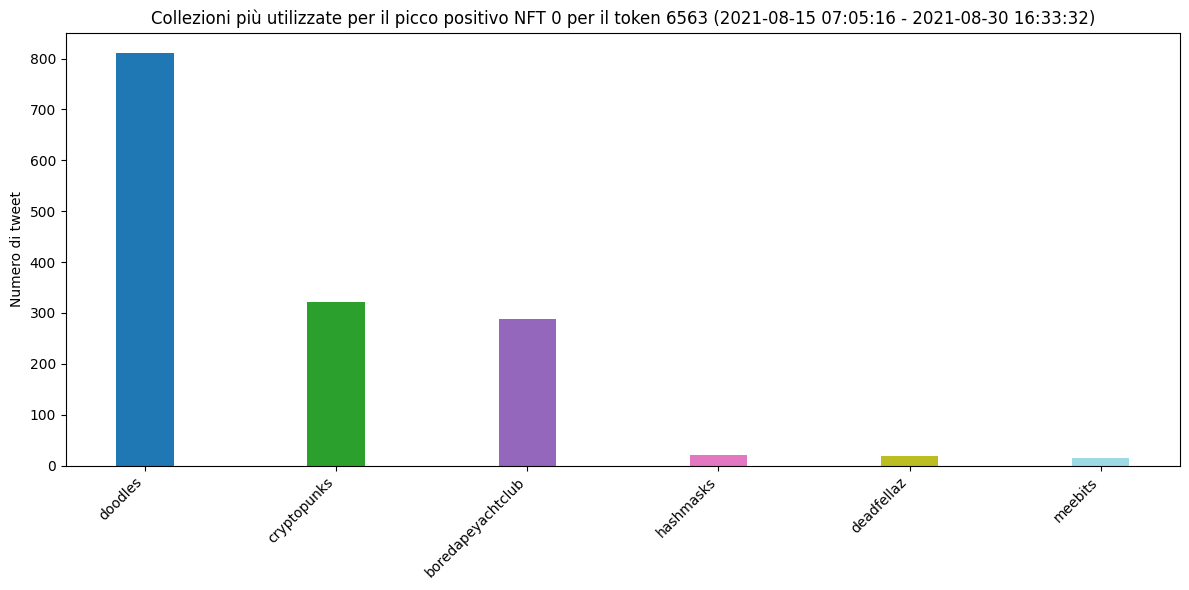


Picco positivo NFT 1 per il token 4037 (2021-11-05 09:46:35 - 2021-11-05 18:42:28)
Collezioni più utilizzate (conteggio dei tweet per collezione):
- doodles: 1267
- boredapeyachtclub: 802
- cryptopunks: 373
- cryptomories: 33
- deadfellaz: 33
- hashmasks: 27
- meebits: 17
**********************


/var/folders/ht/ykt5nd_d1w55_nvpcjzwqvmw0000gn/T/ipykernel_840/3954687936.py:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(collezioni))


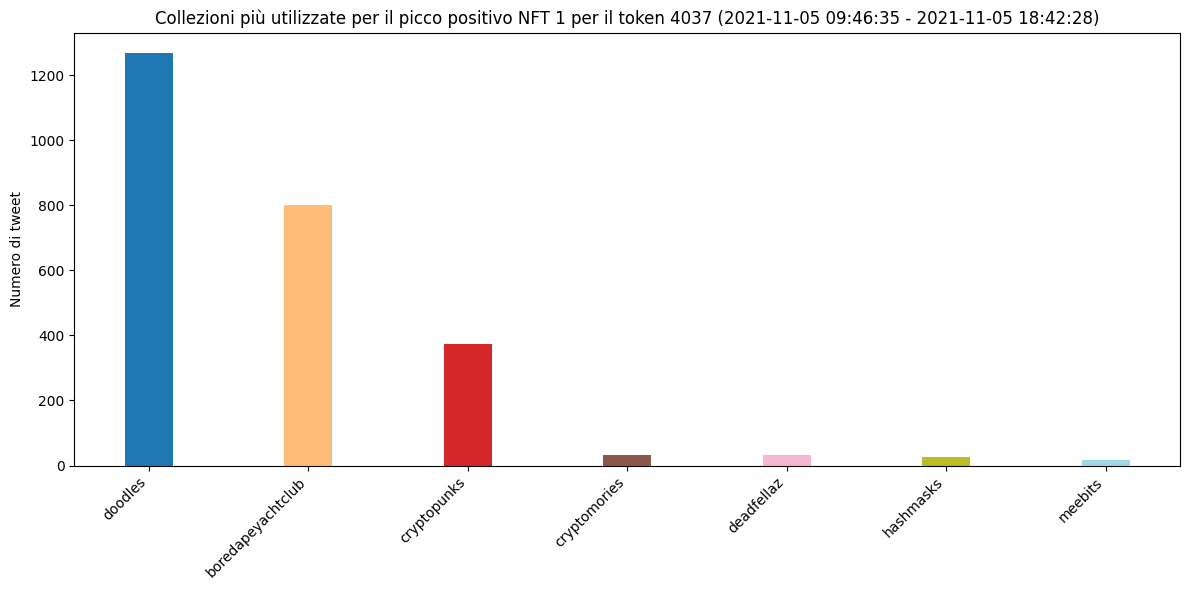


Picco positivo NFT 2 per il token 12247 (2021-02-25 14:23:29 - 2021-02-26 02:48:36)
Collezioni più utilizzate (conteggio dei tweet per collezione):
- doodles: 843
- cryptopunks: 103
- hashmasks: 25
- boredapeyachtclub: 2
**********************


/var/folders/ht/ykt5nd_d1w55_nvpcjzwqvmw0000gn/T/ipykernel_840/3954687936.py:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(collezioni))


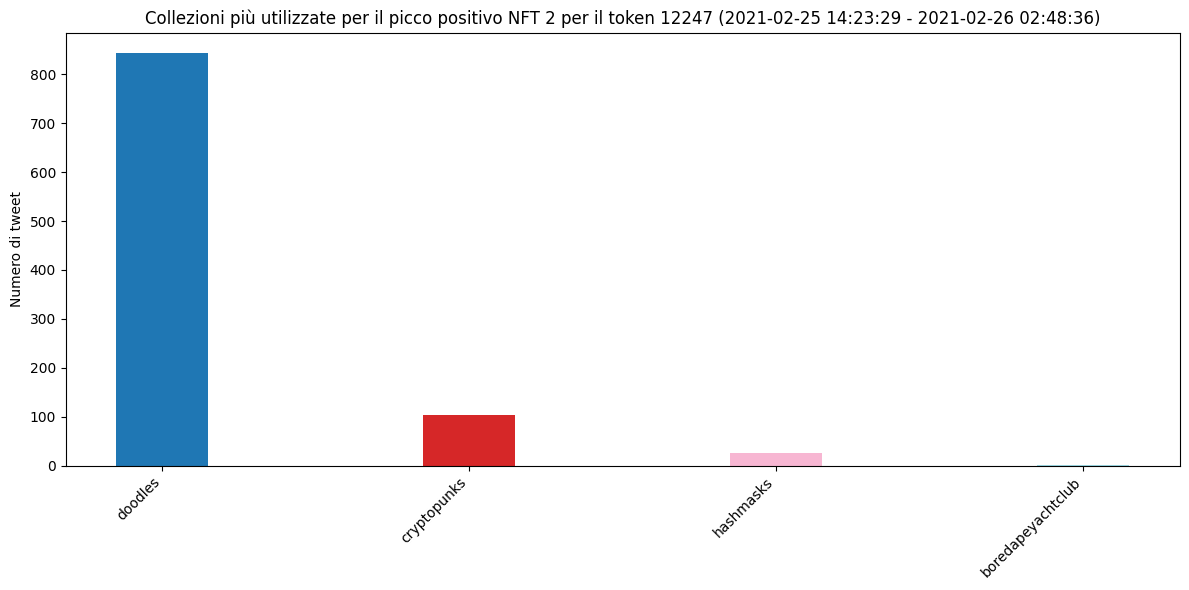


Picco positivo NFT 3 per il token 8898 (2021-05-30 18:06:57 - 2021-06-01 06:39:14)
Collezioni più utilizzate (conteggio dei tweet per collezione):
- doodles: 770
- boredapeyachtclub: 163
- cryptopunks: 161
- meebits: 25
- hashmasks: 12
**********************


/var/folders/ht/ykt5nd_d1w55_nvpcjzwqvmw0000gn/T/ipykernel_840/3954687936.py:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(collezioni))


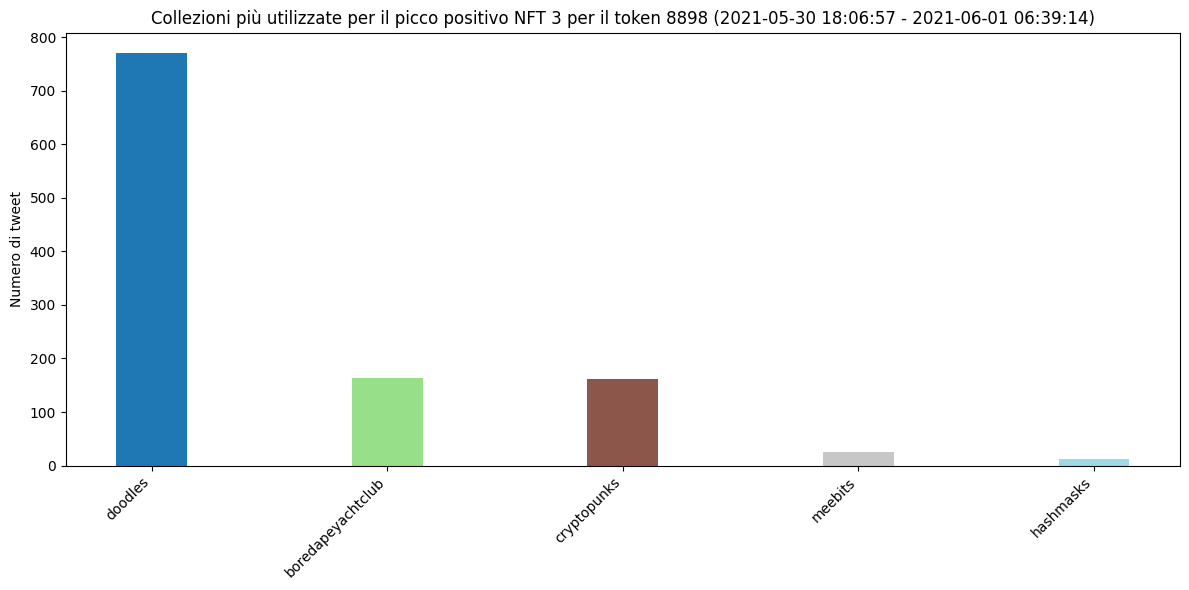


Picco positivo NFT 4 per il token 4704 (2021-12-20 02:29:35 - 2022-01-18 23:35:20)
Collezioni più utilizzate (conteggio dei tweet per collezione):
- doodles: 1756
- boredapeyachtclub: 1285
- cryptopunks: 456
- cryptomories: 147
- little-lemon-friends: 146
- alienfrensnft: 59
- theindifferentduck: 28
- hashmasks: 22
- deadfellaz: 20
- meebits: 20
**********************


/var/folders/ht/ykt5nd_d1w55_nvpcjzwqvmw0000gn/T/ipykernel_840/3954687936.py:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(collezioni))


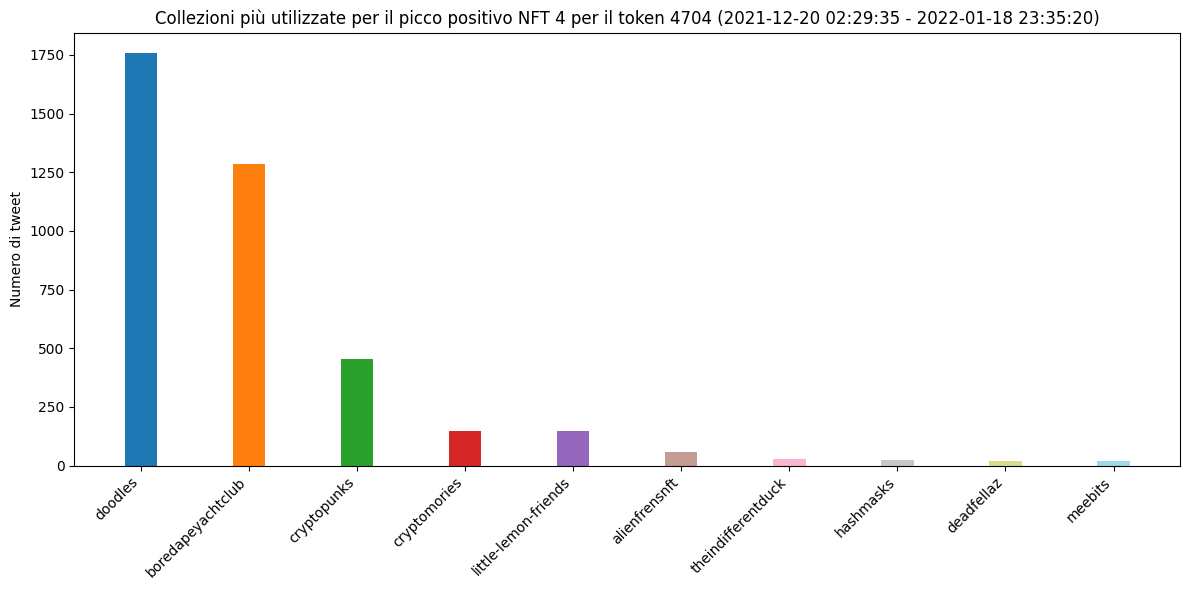

In [101]:
# Dizionario per salvare i conteggi delle collezioni per ogni picco positivo
conteggi_collezioni_per_picco = {}

# Iterazione su ciascun picco positivo di NFT
for index, row in top_nft_positivi.iterrows():
    data_inizio_variazione = row['data_inizio']
    data_fine_variazione = row['data_fine'] 
    token_id = row['token_id'] 

    # Calcola la data di inizio del periodo di interesse (3 giorni prima della data_inizio_variazione)
    data_inizio_filtro = data_inizio_variazione - pd.DateOffset(days=3)
    
    # Filtra i tweet che sono stati fatti nei tre giorni precedenti alla data di inizio variazione
    tweets_filtrati = tweets_sentiment[
        (tweets_sentiment['created_at'] >= data_inizio_filtro) & 
        (tweets_sentiment['created_at'] < data_inizio_variazione)
    ]
    
    # Calcola la media del punteggio totale
    media_punteggio_totale = tweets_filtrati['punteggio_totale'].mean()
    
    # Filtra i tweet con punteggio totale sopra la media
    tweets_filtrati_superiori_media_positivi = tweets_filtrati[tweets_filtrati['punteggio_totale'] > media_punteggio_totale]
    
    # Merge con il dataset delle collezioni 
    tweets_positivi_collezione = pd.merge(tweets_filtrati_superiori_media_positivi, tweets_collection, left_on='tweet_id', right_on='tweet_id', how='left')
    
    # Conteggio delle collezioni più utilizzate per questo picco
    conteggio_collezioni = tweets_positivi_collezione['collection'].value_counts()
    
    # Aggiungi i conteggi al dizionario per il picco corrente
    conteggi_collezioni_per_picco[index] = conteggio_collezioni.to_dict()

    # Stampa le informazioni sul picco positivo di NFT e le collezioni più utilizzate
    print(f"\nPicco positivo NFT {index} per il token {token_id} ({data_inizio_variazione} - {data_fine_variazione})")
    print("Collezioni più utilizzate (conteggio dei tweet per collezione):")
    for collezione, count in conteggio_collezioni.items():
        print(f"- {collezione}: {count}")
    
    print('**********************')
    
    # Preparazione dei dati per il grafico
    collezioni = list(conteggio_collezioni.keys())  # Ottieni le collezioni per questo picco
    num_tweet_per_collezione = [conteggio_collezioni.get(collezione, 0) for collezione in collezioni]

    # Grafico a barre
    fig, ax = plt.subplots(figsize=(12, 6))

    bar_width = 0.3

    ind = np.arange(len(collezioni))

    colors = plt.cm.get_cmap('tab20', len(collezioni))

    ax.bar(ind, num_tweet_per_collezione, bar_width, color=colors(range(len(collezioni))))

    ax.set_ylabel('Numero di tweet')
    ax.set_title(f'Collezioni più utilizzate per il picco positivo NFT {index} per il token {token_id} ({data_inizio_variazione} - {data_fine_variazione})')
    ax.set_xticks(ind)
    ax.set_xticklabels(collezioni, rotation=45, ha='right')  # Etichette delle collezioni con rotazione

    plt.tight_layout()
    plt.show()


# CONTORLLARE GRAFICO PERCHè LO VOGLIO FARE COME QUELLO DI SOPRA A BARRE OVVERO SOTTO CI SONO LE DATE DEI 5 PICCHI POSITIVI E INVECE DELLE BARRE VOGLIO FARE I PUNTINI COLORANDOLI PER OGNI COLLEZIONE 
# ASSE X DATE DEI 5 PICCHI
# ASSE Y PUNTEGGIO TOTALE

## Analisi top nft NEGATIVI